In [1]:
import ensaio
import xarray as xr

fname = ensaio.fetch_lightning_creek_magnetic(version=1)
magnetic_grid = xr.load_dataarray(fname)
magnetic_grid

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 512kB
array([[  35.        ,   36.19995   ,   36.69995   , ..., -101.099976  ,
        -100.400024  ,  -99.599976  ],
       [  36.5       ,   37.599976  ,   38.        , ..., -102.20007   ,
        -101.5       , -100.70007   ],
       [  37.099976  ,   38.19995   ,   38.599976  , ..., -103.30005   ,
        -102.599976  , -101.900024  ],
       ...,
       [ 182.79993   ,  172.40002   ,  160.79993   , ...,    0.79992676,
         -24.200073  ,  -41.80005   ],
       [ 182.09998   ,  172.59998   ,  161.40002   , ...,    6.        ,
         -21.5       ,  -41.        ],
       [ 178.79993   ,  170.40002   ,  160.29993   , ...,   11.400024  ,
         -16.        ,  -35.80005   ]], dtype=float32)
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0
Attributes:
    Conventions:   CF-1.8
    title:         Magnetic total-field anomaly of the Lightning Creek sill c...
    crs:           proj=utm zone=54 south datum=WGS84 units=m no_defs ellps=W...
    source:        Interpolated from airborne magnetic line data using gradie...
    license:       Creative Commons Attribution 4.0 International Licence
    references:    Geophysical Acquisition & Processing Section 2019. MIM Dat...
    long_name:     total-field magnetic anomaly
    units:         nT
    actual_range:  [-1785.  3798.]

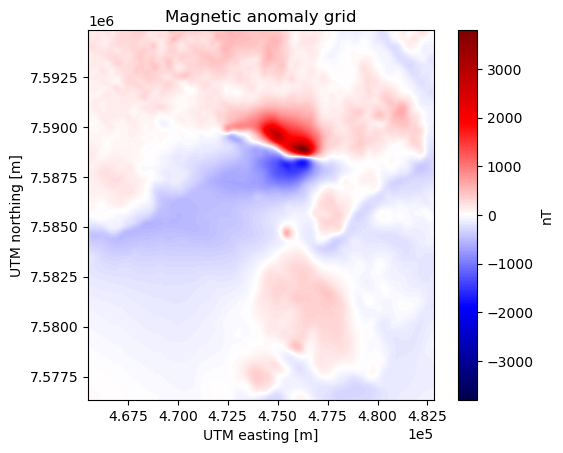

In [2]:
import matplotlib.pyplot as plt

tmp = magnetic_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Magnetic anomaly grid")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [3]:
pad_width = {
    "easting": magnetic_grid.easting.size // 3,
    "northing": magnetic_grid.northing.size // 3,
}

In [4]:
import xrft

magnetic_grid_no_height = magnetic_grid.drop_vars("height")
magnetic_grid_padded = xrft.pad(magnetic_grid_no_height, pad_width)
magnetic_grid_padded

<xarray.DataArray 'total_field_anomaly' (northing: 616, easting: 576)> Size: 1MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * easting   (easting) float64 5kB 4.598e+05 4.598e+05 ... 4.885e+05 4.885e+05
  * northing  (northing) float64 5kB 7.57e+06 7.57e+06 ... 7.601e+06 7.601e+06
Attributes:
    Conventions:   CF-1.8
    title:         Magnetic total-field anomaly of the Lightning Creek sill c...
    crs:           proj=utm zone=54 south datum=WGS84 units=m no_defs ellps=W...
    source:        Interpolated from airborne magnetic line data using gradie...
    license:       Creative Commons Attribution 4.0 International Licence
    references:    Geophysical Acquisition & Processing Section 2019. MIM Dat...
    long_name:     total-field magnetic anomaly
    units:         nT
    actual_range:  [-1785.  3798.]

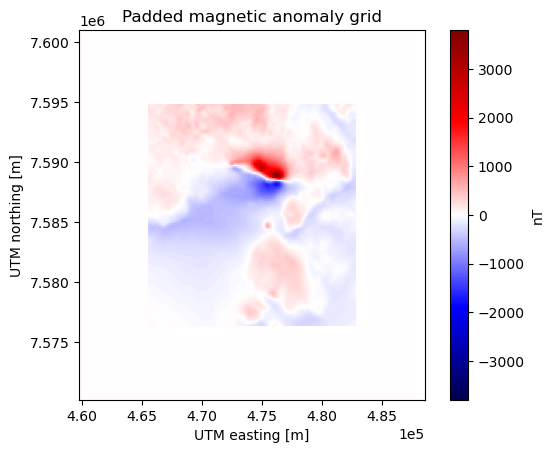

In [5]:
tmp = magnetic_grid_padded.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Padded magnetic anomaly grid")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [6]:
import harmonica as hm

deriv_upward = hm.derivative_upward(magnetic_grid_padded)
deriv_upward

<xarray.DataArray (northing: 616, easting: 576)> Size: 3MB
array([[ 1.33170010e-05,  9.52432798e-06,  5.67172025e-06, ...,
         2.43398647e-05,  2.07242504e-05,  1.70500748e-05],
       [ 2.61432378e-05,  2.24094583e-05,  1.86184385e-05, ...,
         3.70069736e-05,  3.34414963e-05,  2.98204704e-05],
       [ 3.90050348e-05,  3.53287011e-05,  3.15981781e-05, ...,
         4.97132608e-05,  4.61968158e-05,  4.26275223e-05],
       ...,
       [-2.49540481e-05, -2.89307684e-05, -3.29763487e-05, ...,
        -1.34304860e-05, -1.72044538e-05, -2.10453870e-05],
       [-1.22311478e-05, -1.61452928e-05, -2.01251523e-05, ...,
        -8.78416548e-07, -4.59825256e-06, -8.38238562e-06],
       [ 5.25638946e-07, -3.32701915e-06, -7.24270765e-06, ...,
         1.17116107e-05,  8.04443285e-06,  4.31601166e-06]])
Coordinates:
  * easting   (easting) float64 5kB 4.598e+05 4.598e+05 ... 4.885e+05 4.885e+05
  * northing  (northing) float64 5kB 7.57e+06 7.57e+06 ... 7.601e+06 7.601e+06

In [7]:
deriv_upward = xrft.unpad(deriv_upward, pad_width)
deriv_upward

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 0.95819797,  0.62479631,  0.65249329, ..., -1.73446106,
        -1.67664073, -2.7243531 ],
       [ 0.63634155,  0.21904983,  0.23107703, ..., -0.49049877,
        -0.45948262, -1.68410265],
       [ 0.66359221,  0.23536193,  0.2450619 , ..., -0.51034902,
        -0.49225175, -1.75482593],
       ...,
       [ 3.3946594 ,  0.9299787 ,  0.84907987, ..., -0.18739683,
        -0.37947336, -1.13012159],
       [ 3.28895305,  0.89679032,  0.84612464, ..., -0.15550245,
        -0.36489469, -1.12153511],
       [ 5.04819984,  2.91262219,  2.80733139, ...,  0.11714946,
        -0.38706034, -1.26040298]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

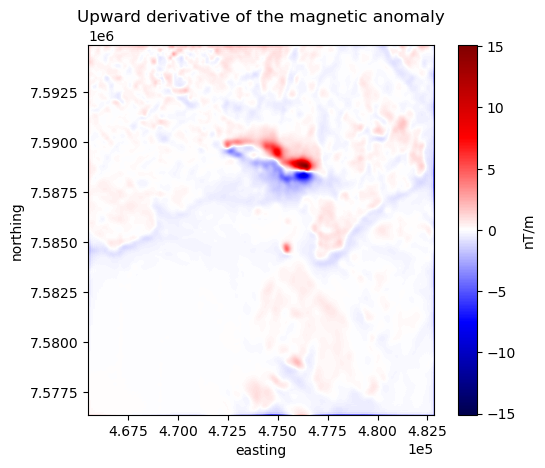

In [8]:
tmp = deriv_upward.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Upward derivative of the magnetic anomaly")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT/m")
plt.show()

In [9]:
deriv_easting = hm.derivative_easting(magnetic_grid)
deriv_easting

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 512kB
array([[ 0.02399902,  0.01699951,  0.00400024, ...,  0.01599976,
         0.015     ,  0.01600098],
       [ 0.02199951,  0.015     ,  0.00400024, ...,  0.015     ,
         0.015     ,  0.01599853],
       [ 0.02199951,  0.015     ,  0.00300049, ...,  0.015     ,
         0.01400024,  0.01399902],
       ...,
       [-0.20799805, -0.22      , -0.22100097, ..., -0.5530005 ,
        -0.42599976, -0.35199952],
       [-0.19      , -0.20699951, -0.21800049, ..., -0.6019995 ,
        -0.47      , -0.39      ],
       [-0.16799805, -0.185     , -0.2       , ..., -0.5969995 ,
        -0.47200072, -0.39600098]], dtype=float32)
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0

In [10]:
deriv_northing = hm.derivative_northing(magnetic_grid)
deriv_northing

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 512kB
array([[ 0.03      ,  0.02800049,  0.02600098, ..., -0.02200195,
        -0.02199951, -0.02200195],
       [ 0.02099976,  0.02      ,  0.01900024, ..., -0.02200073,
        -0.02199951, -0.02300049],
       [ 0.00599976,  0.005     ,  0.005     , ..., -0.02299927,
        -0.02400024, -0.025     ],
       ...,
       [-0.00199951,  0.01400024,  0.02200073, ...,  0.10300049,
         0.03599976, -0.015     ],
       [-0.04      , -0.02      , -0.005     , ...,  0.10600097,
         0.08200073,  0.06      ],
       [-0.06600098, -0.04399902, -0.02200195, ...,  0.10800049,
         0.11      ,  0.10399903]], dtype=float32)
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0

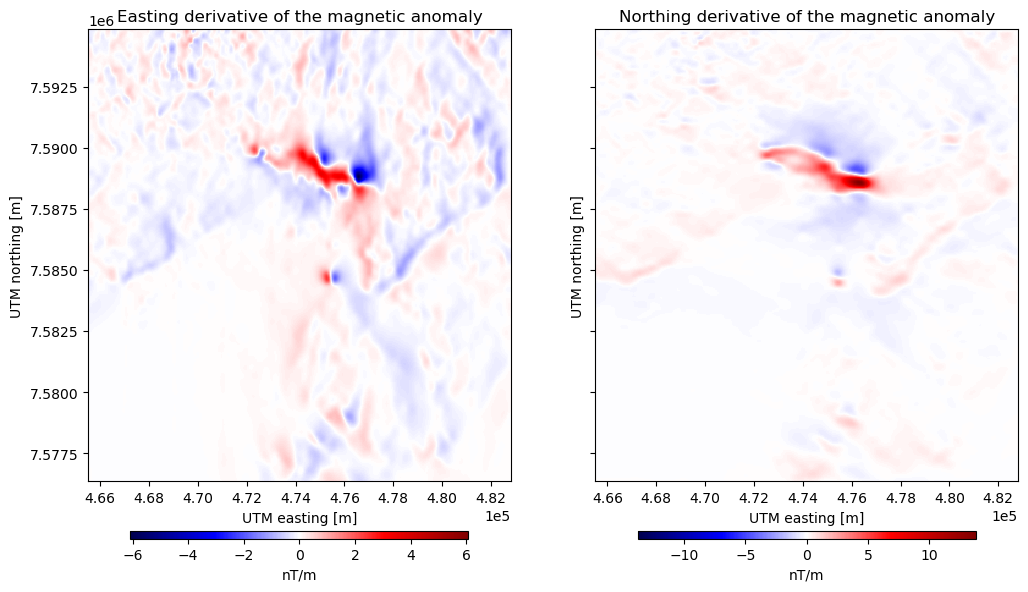

In [11]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

cbar_kwargs=dict(
    label="nT/m", orientation="horizontal", shrink=0.8, pad=0.08, aspect=42
)
kwargs = dict(center=0, cmap="seismic", cbar_kwargs=cbar_kwargs)

tmp = deriv_easting.plot(ax=ax1, **kwargs)
tmp = deriv_northing.plot(ax=ax2, **kwargs)

ax1.set_title("Easting derivative of the magnetic anomaly")
ax2.set_title("Northing derivative of the magnetic anomaly")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))
plt.show()

In [12]:
deriv_easting = hm.derivative_easting(magnetic_grid_padded, method="fft")
deriv_easting = xrft.unpad(deriv_easting, pad_width)
deriv_easting

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 0.50048189, -0.1927814 ,  0.1357725 , ...,  0.39878718,
        -0.59429492,  1.39003573],
       [ 0.52115518, -0.20585515,  0.1431599 , ...,  0.40290014,
        -0.601334  ,  1.40562022],
       [ 0.52891843, -0.20861634,  0.14348668, ...,  0.40827736,
        -0.61014921,  1.42089157],
       ...,
       [ 2.43620524, -1.3841688 ,  0.49946329, ..., -0.3666973 ,
        -0.73927341,  0.42750678],
       [ 2.43711461, -1.36261579,  0.49770341, ..., -0.41819685,
        -0.78503279,  0.39910907],
       [ 2.40158947, -1.31498147,  0.5016298 , ..., -0.43062003,
        -0.75786069,  0.32352992]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

In [13]:
deriv_northing = hm.derivative_northing(magnetic_grid_padded, method="fft")
deriv_northing = xrft.unpad(deriv_northing, pad_width)
deriv_northing

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 0.4998185 ,  0.51505215,  0.52086047, ..., -1.41297197,
        -1.40373341, -1.39047911],
       [-0.18344108, -0.19204698, -0.19683734, ...,  0.59467737,
         0.59123353,  0.58320208],
       [ 0.13266601,  0.13715393,  0.14021693, ..., -0.41085619,
        -0.41006457, -0.40635707],
       ...,
       [-0.67324956, -0.62931958, -0.58751428, ...,  0.04336819,
         0.07440814,  0.09627284],
       [ 1.03876533,  1.0129475 ,  0.97022432, ...,  0.19945125,
         0.01275229, -0.12811101],
       [-2.51808914, -2.39082358, -2.23713166, ..., -0.10561208,
         0.28247267,  0.55809773]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

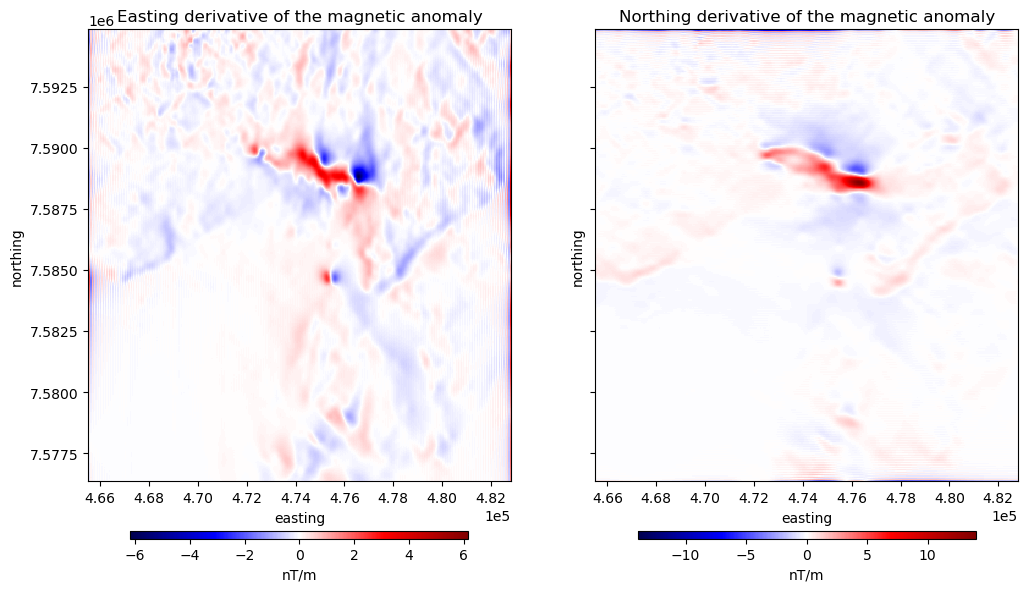

In [14]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

cbar_kwargs=dict(
    label="nT/m", orientation="horizontal", shrink=0.8, pad=0.08, aspect=42
)
kwargs = dict(center=0, cmap="seismic", cbar_kwargs=cbar_kwargs)

tmp = deriv_easting.plot(ax=ax1, **kwargs)
tmp = deriv_northing.plot(ax=ax2, **kwargs)

ax1.set_title("Easting derivative of the magnetic anomaly")
ax2.set_title("Northing derivative of the magnetic anomaly")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))
plt.show()

In [15]:
upward_continued = hm.upward_continuation(
    magnetic_grid_padded, height_displacement=500
)

In [16]:
upward_continued = xrft.unpad(upward_continued, pad_width)
upward_continued

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[  1.5318864 ,   1.85100319,   2.13679603, ..., -33.60489015,
        -31.65890937, -29.67750194],
       [  1.82033329,   2.17484726,   2.49236703, ..., -35.96395426,
        -33.83598794, -31.6667934 ],
       [  2.07317532,   2.45927687,   2.80499305, ..., -38.27995984,
        -35.97492132, -33.62307385],
       ...,
       [ 50.44856723,  53.84378576,  57.13892691, ...,   4.05301916,
          2.81272894,   1.764435  ],
       [ 47.56514008,  50.69951642,  53.74614319, ...,   4.66844263,
          3.44420588,   2.39520989],
       [ 44.6368305 ,  47.50470955,  50.29752195, ...,   5.03756138,
          3.86192233,   2.84250804]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

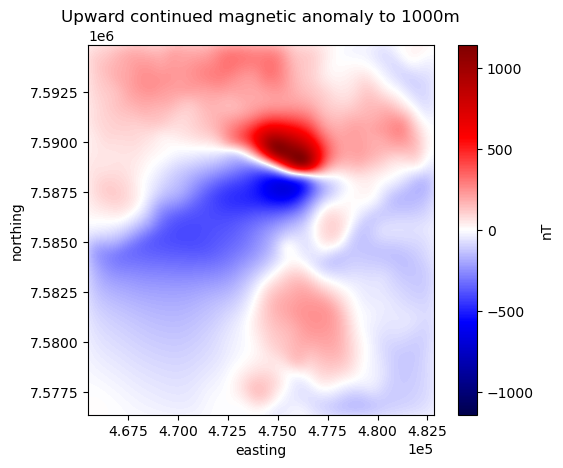

In [17]:
tmp = upward_continued.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Upward continued magnetic anomaly to 1000m")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [18]:
inclination, declination = -52.98, 6.51

In [19]:
rtp_grid = hm.reduction_to_pole(
    magnetic_grid_padded, inclination=inclination, declination=declination
)

# Unpad the reduced to the pole grid
rtp_grid = xrft.unpad(rtp_grid, pad_width)
rtp_grid

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[  14.15556282,   10.38429905,   10.02003492, ..., -219.81018247,
        -210.93025635, -179.38408421],
       [  -3.21243279,   -9.37121782,  -10.96584477, ..., -165.15303656,
        -158.0958179 , -133.29352054],
       [  -2.3217145 ,   -9.44938578,  -11.35228505, ..., -170.79735965,
        -165.25667548, -141.046265  ],
       ...,
       [  45.45699147,  -24.80993602,  -51.27393817, ...,  -40.42604764,
         -64.12375288,  -75.97556361],
       [  36.91047424,  -37.13717168,  -58.40649469, ...,  -34.55576242,
         -55.65612416,  -71.01718934],
       [-102.42457874, -155.67864799, -165.96649111, ...,  -36.95819436,
         -35.04014832,  -40.15060688]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

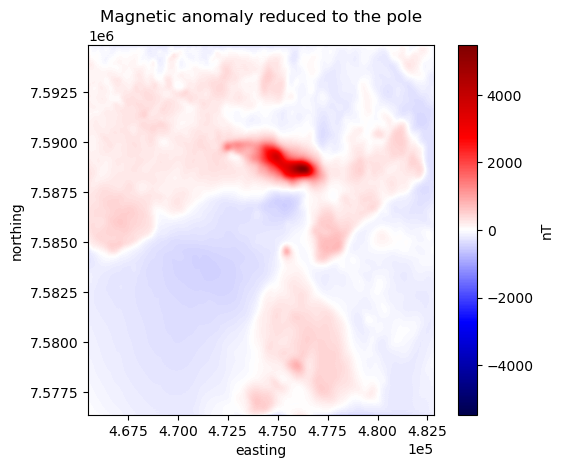

In [20]:
tmp = rtp_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Magnetic anomaly reduced to the pole")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [21]:
mag_inclination, mag_declination = -25, 21

tmp = rtp_grid = hm.reduction_to_pole(
    magnetic_grid_padded,
    inclination=inclination,
    declination=declination,
    magnetization_inclination=mag_inclination,
    magnetization_declination=mag_declination,
)

# Unpad the reduced to the pole grid
rtp_grid = xrft.unpad(rtp_grid, pad_width)
rtp_grid

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ -77.45213498, -114.40580183, -117.03946527, ...,  -87.74334513,
         -75.65311786,   43.05422627],
       [ -99.41761727, -137.48341563, -141.51463219, ...,  -31.30675001,
         -20.40276016,   92.22734679],
       [ -99.90958793, -139.38027341, -143.11774631, ...,  -38.52925024,
         -29.73748202,   83.23546089],
       ...,
       [  13.25373968, -170.27661708, -163.93666318, ...,  -44.43377684,
         -80.78997965,  -66.80602774],
       [ -28.4775795 , -187.01875283, -173.90318081, ...,  -27.82006314,
         -55.31901234,  -61.09796854],
       [-236.07965274, -301.62726523, -299.61036415, ...,  -28.01934017,
         -18.38089699,  -22.65820682]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

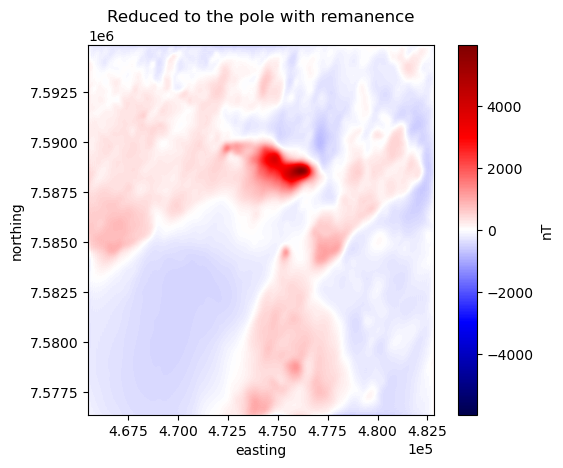

In [22]:
tmp = rtp_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Reduced to the pole with remanence")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [23]:
cutoff_wavelength = 5e3

In [24]:
magnetic_low_freqs = hm.gaussian_lowpass(
    magnetic_grid_padded, wavelength=cutoff_wavelength
)
magnetic_high_freqs = hm.gaussian_highpass(
    magnetic_grid_padded, wavelength=cutoff_wavelength
)

In [25]:
magnetic_low_freqs = xrft.unpad(magnetic_low_freqs, pad_width)
magnetic_high_freqs = xrft.unpad(magnetic_high_freqs, pad_width)

In [26]:
magnetic_low_freqs

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 4.60586414e+00,  4.72026510e+00,  4.81815067e+00, ...,
        -3.68551892e+01, -3.50940481e+01, -3.33406525e+01],
       [ 4.70588288e+00,  4.81992298e+00,  4.91669488e+00, ...,
        -3.87398513e+01, -3.68891918e+01, -3.50465475e+01],
       [ 4.78689904e+00,  4.89970003e+00,  4.99449202e+00, ...,
        -4.06231159e+01, -3.86830241e+01, -3.67512054e+01],
       ...,
       [ 5.24052381e+01,  5.51977770e+01,  5.80158127e+01, ...,
        -8.46616115e-01, -1.00253896e+00, -1.15999951e+00],
       [ 5.00637859e+01,  5.27307793e+01,  5.54221687e+01, ...,
         1.79773740e-01, -1.44068907e-02, -2.10512248e-01],
       [ 4.77049502e+01,  5.02456889e+01,  5.28097252e+01, ...,
         1.08697396e+00,  8.60208050e-01,  6.31175660e-01]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

In [27]:
magnetic_high_freqs

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 30.39413586,  31.47968607,  31.8818005 , ..., -64.24478639,
        -65.30597631, -66.25932308],
       [ 31.79411712,  32.7800526 ,  33.08330512, ..., -63.46022197,
        -64.61080822, -65.65352577],
       [ 32.31307654,  33.30025114,  33.60548357, ..., -62.67693291,
        -63.91695151, -65.14881903],
       ...,
       [130.39468868, 117.20224742, 102.78411409, ...,   1.64654287,
        -23.19753428, -40.64004932],
       [132.03618967, 119.86919632, 105.97785568, ...,   5.82022626,
        -21.48559311, -40.78948775],
       [131.09497652, 120.15433554, 107.49020153, ...,  10.31305045,
        -16.86020805, -36.43122449]])
Coordinates:
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06

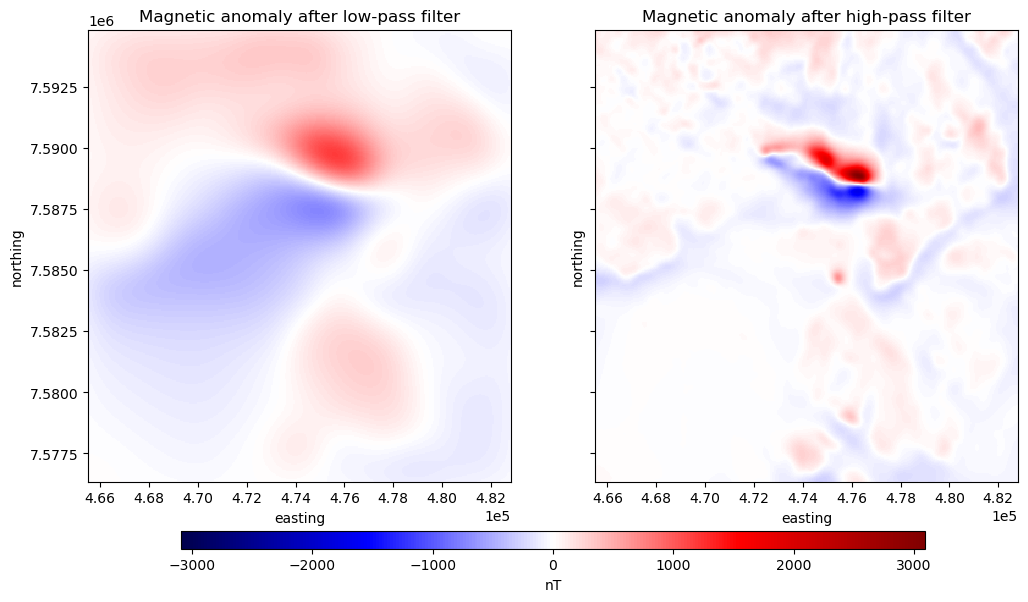

In [28]:
import verde as vd

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

maxabs = vd.maxabs(magnetic_low_freqs, magnetic_high_freqs)
kwargs = dict(cmap="seismic", vmin=-maxabs, vmax=maxabs, add_colorbar=False)

tmp = magnetic_low_freqs.plot(ax=ax1, **kwargs)
tmp = magnetic_high_freqs.plot(ax=ax2, **kwargs)

ax1.set_title("Magnetic anomaly after low-pass filter")
ax2.set_title("Magnetic anomaly after high-pass filter")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))

plt.colorbar(
    tmp,
    ax=[ax1, ax2],
    label="nT",
    orientation="horizontal",
    aspect=42,
    shrink=0.8,
    pad=0.08,
)
plt.show()